<a href="https://colab.research.google.com/github/carlaolivei/Analise-Modelagem-dados-COVID-19/blob/main/visualizacao_analise_dados_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Importação das Bibliotecas</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgo

<h1>Importação e Leitura dos Dados</h1>

In [2]:
## https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu
## liberando o acesso ao drive
## use essa opção se utilizar o Google Drive, neste caso basta apenas colocar o arquivo em uma pasta do Drive e copiar o caminho
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#utilize esta opção se desejar fazer o upload do arquivo
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

print("Upload concluído!")

Saving owid-covid-data.csv to owid-covid-data.csv
User uploaded file "owid-covid-data.csv" with length 65193949 bytes
Upload concluído!


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Inteligência Artificial/PUC-Minas/Puc-Minas-IA/13 - TCC/Dataset/owid-covid-data.csv')
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
234498,ZWE,Africa,Zimbabwe,2022-11-08,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
234499,ZWE,Africa,Zimbabwe,2022-11-09,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
234500,ZWE,Africa,Zimbabwe,2022-11-10,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
234501,ZWE,Africa,Zimbabwe,2022-11-11,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
234502,ZWE,Africa,Zimbabwe,2022-11-12,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


<h1>Pré-processamento e Tratamento dos Dados</h1>

In [4]:
df.shape

(234503, 67)

In [5]:
df['location'].unique().shape

(248,)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234503 entries, 0 to 234502
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    234503 non-null  object 
 1   continent                                   221271 non-null  object 
 2   location                                    234503 non-null  object 
 3   date                                        234503 non-null  object 
 4   total_cases                                 221310 non-null  float64
 5   new_cases                                   221006 non-null  float64
 6   new_cases_smoothed                          219808 non-null  float64
 7   total_deaths                                202034 non-null  float64
 8   new_deaths                                  201963 non-null  float64
 9   new_deaths_smoothed                         200783 non-null  float64
 

In [7]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [8]:
df_country = df
df_country['location'].unique().shape

(248,)

In [9]:
df_country = df_country.drop(df_country[(df_country['location'] == 'Africa')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Asia')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Europe')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'European Union')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'High income')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'International')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Low income')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Lower middle income')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'North America')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'South America')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'Upper middle income')].index)
df_country = df_country.drop(df_country[(df_country['location'] == 'World')].index)
df_country.reset_index(drop=True, inplace=True)

In [10]:
df_country['location'].unique().shape

(236,)

In [11]:
df.shape

(234503, 67)

In [12]:
df_country.shape

(222294, 67)

In [13]:
features_list = ['location', 'date','total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 
                 'reproduction_rate', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 
                 'total_boosters', 'population']

In [14]:
df_features = df_country[df_country.columns.intersection(features_list)]
df_features.head(1)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


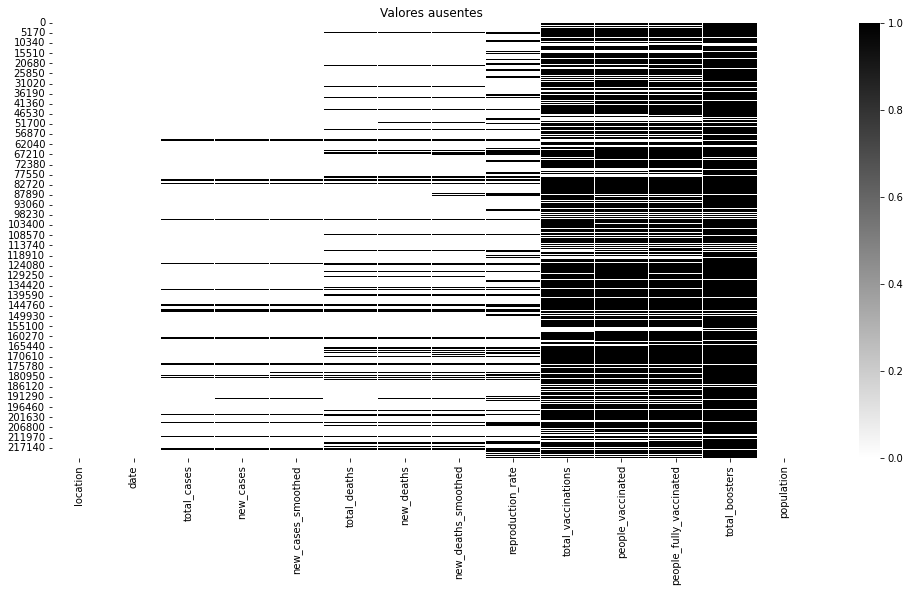

In [15]:
f, ax = plt.subplots(figsize=(17, 8))
ax.set_title('Valores ausentes')
sns.heatmap(df_features.isnull(),cmap='binary')

In [16]:
df_features["new_cases"].replace(np.nan, 0, inplace=True)
df_features["new_cases_smoothed"].replace(np.nan, 0, inplace=True)
df_features["total_deaths"].replace(np.nan, 0, inplace=True)
df_features["new_deaths"].replace(np.nan, 0, inplace=True)
df_features["new_deaths_smoothed"].replace(np.nan, 0, inplace=True)
df_features["reproduction_rate"].replace(np.nan, 0, inplace=True)
df_features["total_vaccinations"].replace(np.nan, 0, inplace=True)
df_features["people_vaccinated"].replace(np.nan, 0, inplace=True)
df_features["people_fully_vaccinated"].replace(np.nan, 0, inplace=True)
df_features["total_boosters"].replace(np.nan, 0, inplace=True)
df_features["total_cases"].replace(np.nan, 0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df_features.isnull().sum()

location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
total_deaths               0
new_deaths                 0
new_deaths_smoothed        0
reproduction_rate          0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
dtype: int64

In [ ]:
df_features.to_csv('df_features.csv')

In [ ]:
from google.colab import files
files.download("df_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> Análise Exploratória dos Dados</h1>

Paleta de cores: https://celke.com.br/artigo/tabela-de-cores-html-nome-hexadecimal-rgb

In [18]:
# 'population' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# total da população mundial
total = df_features.groupby('location').agg({'population':max})
total_population = total['population'].sum()
total_population

8087831091.0

In [19]:
#'total_deaths' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# total de mortes atribuídas ao COVID-19 no mundo
df_people_total_deaths = df_features.groupby('location').agg({'total_deaths':max})
sum_total_deaths = df_people_total_deaths['total_deaths'].sum()
sum_total_deaths

6630462.0

In [20]:
#'total_cases' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# total de casos confirmados de COVID-19 no mundo
df_people_total_cases = df_features.groupby('location').agg({'total_cases':max})
sum_total_cases = df_people_total_cases['total_cases'].sum()
sum_total_cases

647631983.0

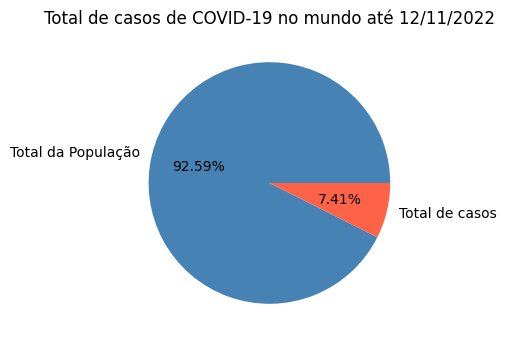

In [21]:
plt.figure(figsize=(8,4),dpi=100)
plt.pie(
    [total_population,sum_total_cases],
    autopct='%.2F%%',
    colors = ['#4682B4','#FF6347'],
    labels=['Total da População','Total de casos'],)
plt.title('Total de casos de COVID-19 no mundo até 12/11/2022')
plt.show()

In [22]:
#'total_vaccinations' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de doses de vacinação COVID-19 administradas no mundo
df_people_total_vaccinated = df_features.groupby('location').agg({'total_vaccinations':max})
sum_vac_total = df_people_total_vaccinated['total_vaccinations'].sum()
sum_vac_total

13182332910.0

In [23]:
#'people_fully_vaccinated' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial no mundo
df_people_fully_vaccinated = df_features.groupby('location').agg({'people_fully_vaccinated':max})
sum_vac_full = df_people_fully_vaccinated['people_fully_vaccinated'].sum()
sum_vac_full

5082713562.0

In [24]:
#'people_vaccinated' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de pessoas que receberam pelo menos uma dose de vacina no mundo
df_country_vac = df_features.groupby('location').agg({'people_vaccinated':max}).reset_index()
sum_vac = df_country_vac['people_vaccinated'].sum()
sum_vac

5524245544.0

In [25]:
#'total_boosters' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação
df_people_total_boosters = df_features.groupby('location').agg({'total_boosters':max})
sum_total_boosters = df_people_total_boosters['total_boosters'].sum()
sum_total_boosters

2679728797.0

In [26]:
date_group = df_features.groupby('date').agg('sum').reset_index()
date_group.head(1)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173014444.0


Text(0.5, 1.0, 'Total de Vacinados vs Total de Novas Mortes por Covid 19 no mundo até 12/11/2022')

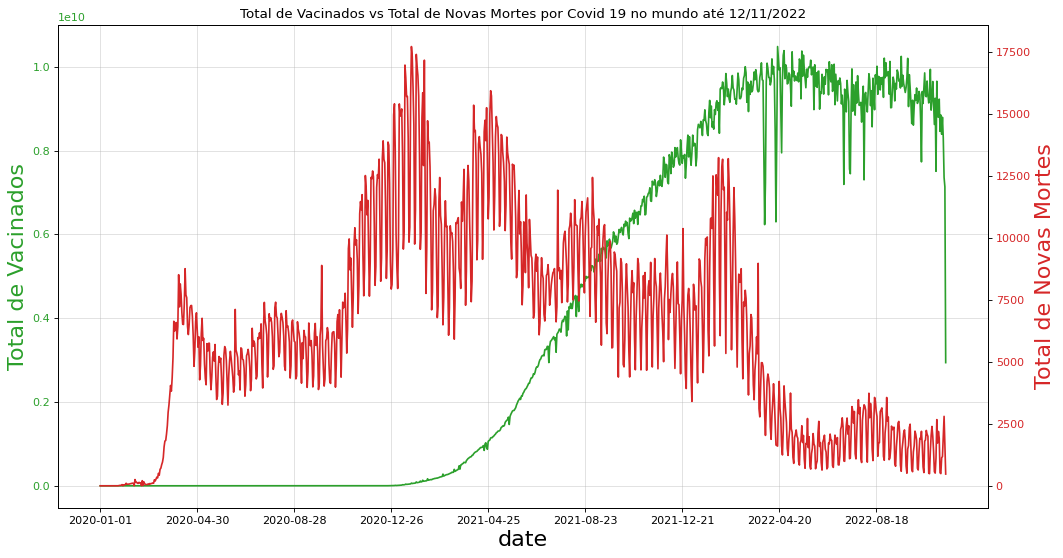

In [27]:
#preparação dos dados
x = date_group['date']
y1 = date_group['total_vaccinations']
y2 = date_group['new_deaths']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:green')

#linh 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('date',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de Vacinados',color='tab:green',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:green')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Total de Novas Mortes',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Total de Vacinados vs Total de Novas Mortes por Covid 19 no mundo até 12/11/2022')

Text(0.5, 1.0, 'Total de novos casos vs Total de novas mortes por Covid 19 no mundo até 12/11/2022')

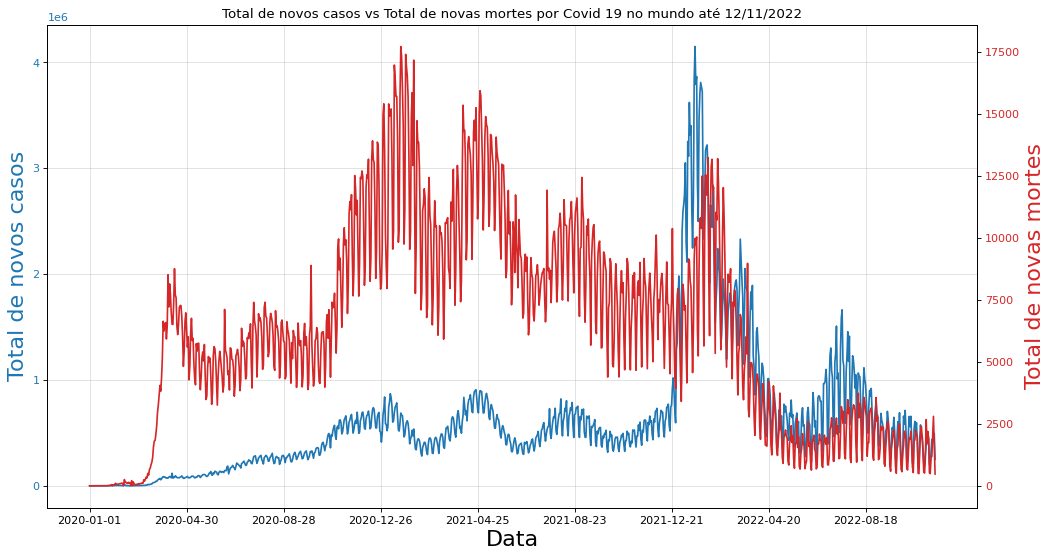

In [28]:
#preparação dos dados
x = date_group['date']
y1 = date_group['new_cases']
y2 = date_group['new_deaths']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novos casos',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Total de novas mortes',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Total de novos casos vs Total de novas mortes por Covid 19 no mundo até 12/11/2022')

In [29]:
df_country_full_vac = df_features.groupby('location').agg({'people_fully_vaccinated':max})
df_country_full_vac.sort_values(['people_fully_vaccinated'], ascending=False, axis=0, inplace=True)
df_country_full_vac_top10 = df_country_full_vac.head(10)
df_country_full_vac_top10[[]]

""
location
China
India
United States
Brazil
Indonesia
Pakistan
Bangladesh
Japan
Vietnam


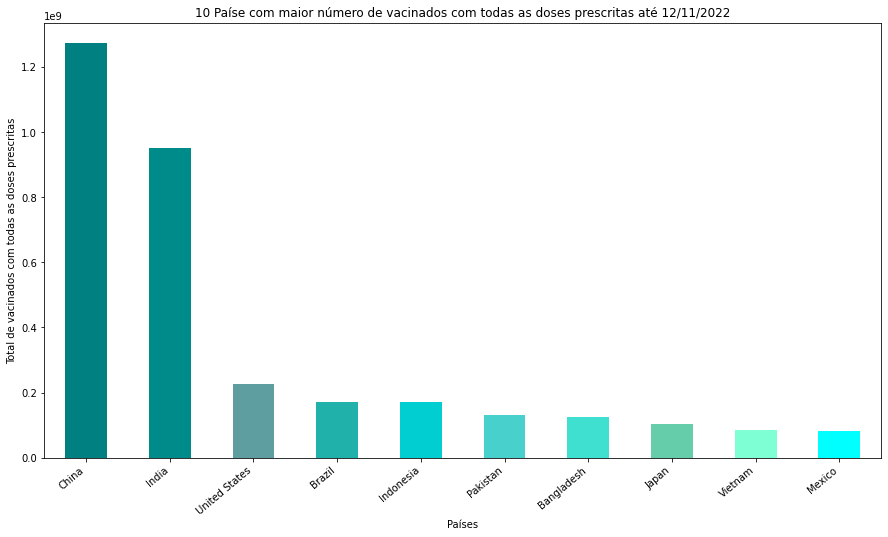

In [30]:
colors_list1 = ['Teal', 'DarkCyan', 'CadetBlue', 'LightSeaGreen', 'DarkTurquoise','MediumTurquoise','Turquoise','MediumAquamarine','Aquamarine','Aqua']

ax = df_country_full_vac_top10['people_fully_vaccinated'].plot(kind='bar', figsize=(15, 8),color = colors_list1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel('Países') 
plt.ylabel('Total de vacinados com todas as doses prescritas') 
plt.title('10 Paíse com maior número de vacinados com todas as doses prescritas até 12/11/2022') 

plt.show()

In [31]:
df_country_deaths = df_features.groupby('location').sum('New_deaths')
df_country_deaths.sort_values(['new_deaths'], ascending=False, axis=0, inplace=True)
df_country_deaths_top10 = df_country_deaths.head(10)
df_country_deaths_top10[[]]

""
location
United States
Brazil
India
Russia
Mexico
Peru
United Kingdom
Italy
Indonesia


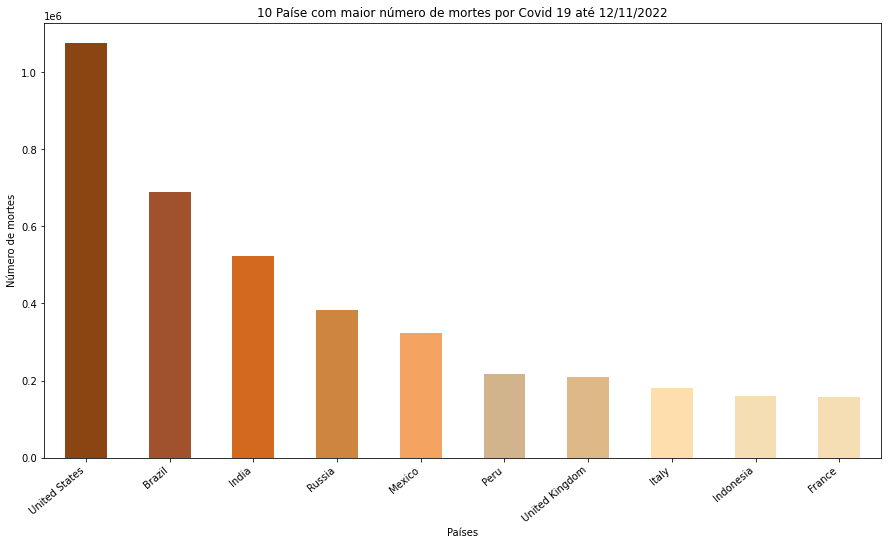

In [32]:
colors_list2 = ['SaddleBrown', 'Sienna', 'Chocolate', 'Peru', 'SandyBrown','Tan','BurlyWood','NavajoWhite','Wheat','Wheat']

ax = df_country_deaths_top10['new_deaths'].plot(kind='bar', figsize=(15, 8),color = colors_list2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel('Países')
plt.ylabel('Número de mortes')
plt.title('10 Paíse com maior número de mortes por Covid 19 até 12/11/2022')

plt.show()

<h1>Analise Exploratório dos Dados do Brasil</h1>

In [33]:
df_brazil = df_features[df_features['location']=='Brazil']

In [34]:
df_brazil.tail(1)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
27572,Brazil,2022-11-12,34908198.0,0.0,0.0,688656.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215313504.0


In [35]:
df_brazil.shape

(991, 14)

In [36]:
df_brazil.isnull().sum()

location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
total_deaths               0
new_deaths                 0
new_deaths_smoothed        0
reproduction_rate          0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
dtype: int64

In [37]:
#total da população do brazil
total_pop_brazil = df_brazil['population'].unique().max()
total_pop_brazil

215313504.0

In [38]:
#'total_deaths' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# Total de mortes atribuídas ao COVID-19 no Brasil
df_country_brazil = df_brazil.agg({'total_deaths':max})
sum_total_deaths_brazil = df_country_brazil['total_deaths'].sum()
sum_total_deaths_brazil

688656.0

In [39]:
#'total_cases' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# total de casos confirmados de COVID-19 no Brasil
df_country_brazil = df_brazil.agg({'total_cases':max})
sum_total_cases_brazil = df_country_brazil['total_cases'].sum()
sum_total_cases_brazil

34908198.0

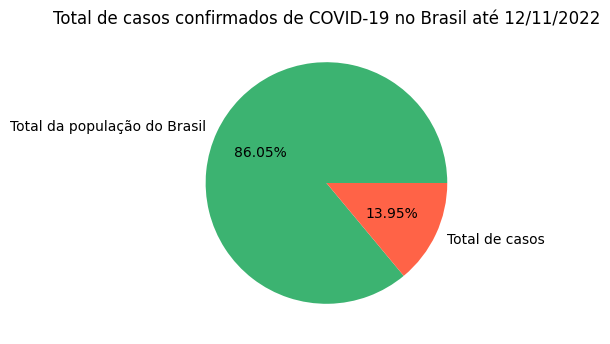

In [40]:
plt.figure(figsize=(8,4),dpi=100)
plt.pie(
    [total_pop_brazil,sum_total_cases_brazil],
    autopct='%.2F%%',
    colors = ['#3CB371','#FF6347'],
    labels=['Total da população do Brasil','Total de casos'],)
plt.title('Total de casos confirmados de COVID-19 no Brasil até 12/11/2022')
plt.show()

In [41]:
#'total_vaccinations' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de doses de vacinação COVID-19 administradas no Brasil
df_country_brazil = df_brazil.agg({'total_vaccinations':max})
sum_total_vaccinations_brazil = df_country_brazil['total_vaccinations'].sum()
sum_total_vaccinations_brazil

473127683.0

In [42]:
#'people_fully_vaccinated' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de pessoas que receberam todas as doses prescritas pelo protocolo no Brasil
df_country_brazil = df_brazil.agg({'people_fully_vaccinated':max})
sum_vac_full_brazil = df_country_brazil['people_fully_vaccinated'].sum()
sum_vac_full_brazil

172351070.0

In [43]:
#'people_vaccinated' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# Número total de pessoas que receberam pelo menos uma dose da vacina no Brasil
df_country_vac_brazil = df_brazil.agg({'people_vaccinated':max})
sum_vac_brazil = df_country_vac_brazil['people_vaccinated'].sum()
sum_vac_brazil

187399523.0

In [44]:
#'total_boosters' é uma coluna que contém valores acumulados por isso é necessário obter o valor máximo por cada país e efetuar uma soma
# número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação)
df_people_total_boosters_brazil = df_brazil.groupby('location').agg({'total_boosters':max})
sum_total_boosters_brazil = df_people_total_boosters_brazil['total_boosters'].sum()
sum_total_boosters_brazil

118811893.0

In [45]:
date_group_brazil = df_brazil.groupby('date').agg('sum').reset_index()
date_group_brazil.head(1)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
0,2020-02-26,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215313504.0


Text(0.5, 1.0, 'Total de vacinados vs Total de novas mortes por Covid 19 - Brasil até 12/11/2022')

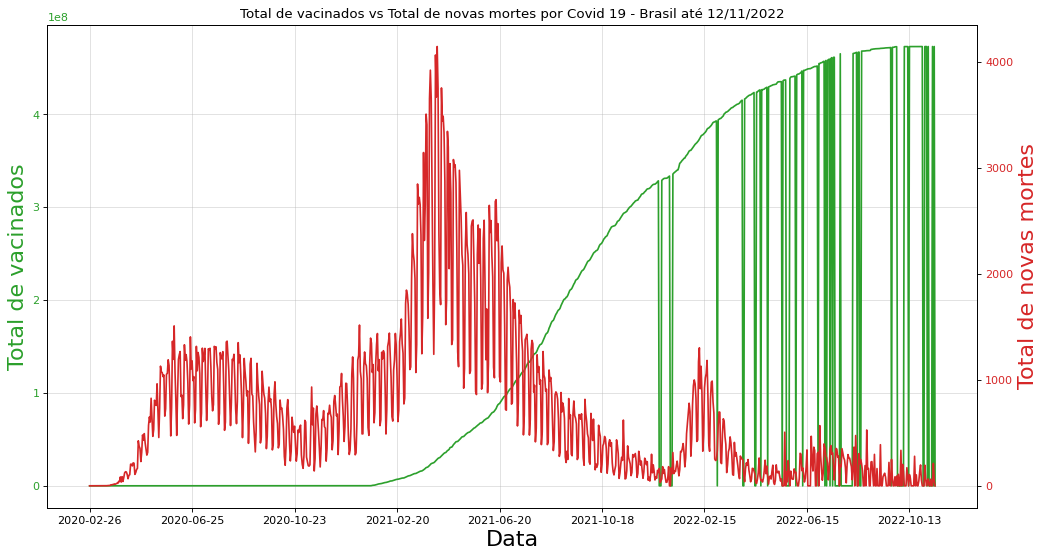

In [46]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['total_vaccinations']
y2 = date_group_brazil['new_deaths']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:green')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de vacinados',color='tab:green',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:green')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Total de novas mortes',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Total de vacinados vs Total de novas mortes por Covid 19 - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Total de novos casos vs Total de novas mortes por Covid 19 - Brasil até 12/11/2022')

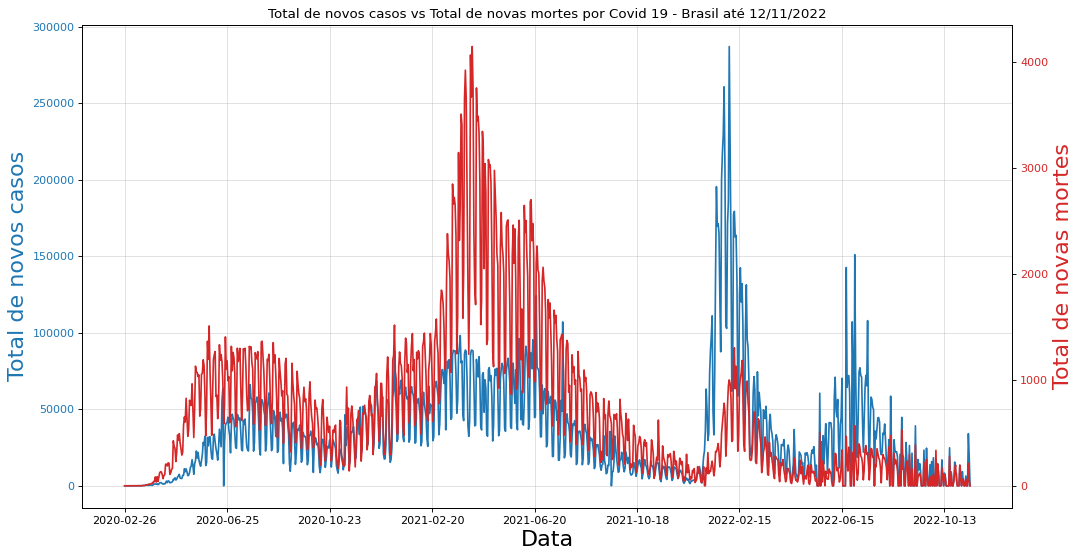

In [47]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_cases']
y2 = date_group_brazil['new_deaths']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novos casos',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Total de novas mortes',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Total de novos casos vs Total de novas mortes por Covid 19 - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Novos casos suavizados vs Novas mortes suavizadas por Covid 19 - Brasil até 12/11/2022')

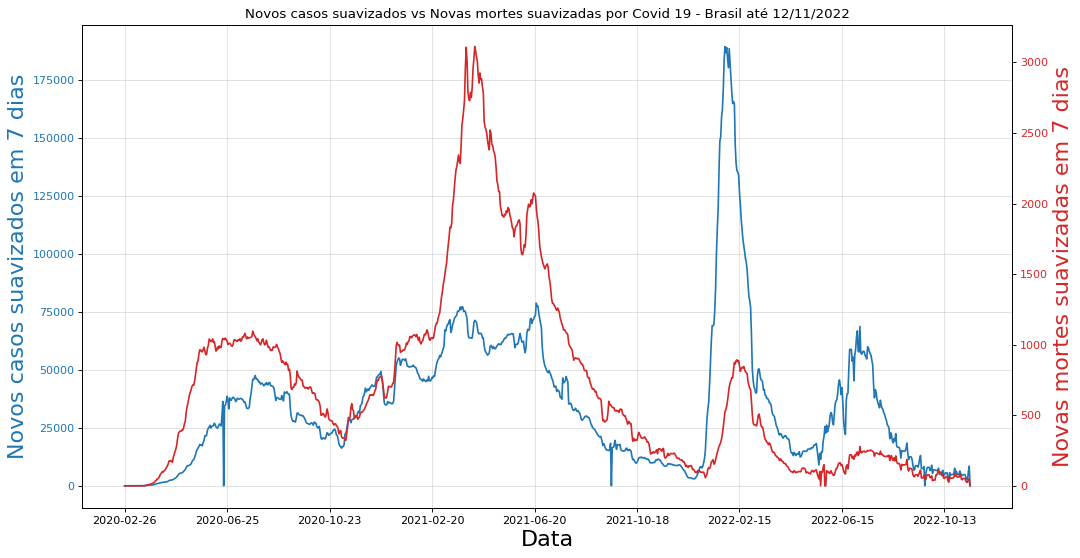

In [48]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_cases_smoothed']
y2 = date_group_brazil['new_deaths_smoothed']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Novos casos suavizados em 7 dias',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Novas mortes suavizadas em 7 dias',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Novos casos suavizados vs Novas mortes suavizadas por Covid 19 - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Total de novos casos vs Total de novos casos suavizados em 7 dias - Brasil até 12/11/2022')

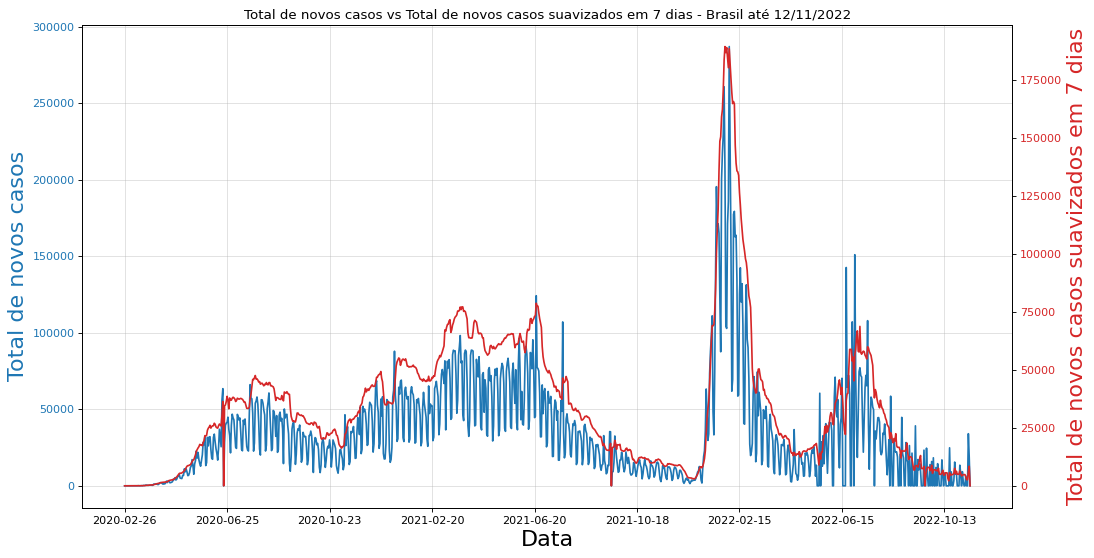

In [49]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_cases']
y2 = date_group_brazil['new_cases_smoothed']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novos casos',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Total de novos casos suavizados em 7 dias',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Total de novos casos vs Total de novos casos suavizados em 7 dias - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Novos casos suavizados em 7 dias vs Taxa de Transimissão - Brasil até 12/11/2022')

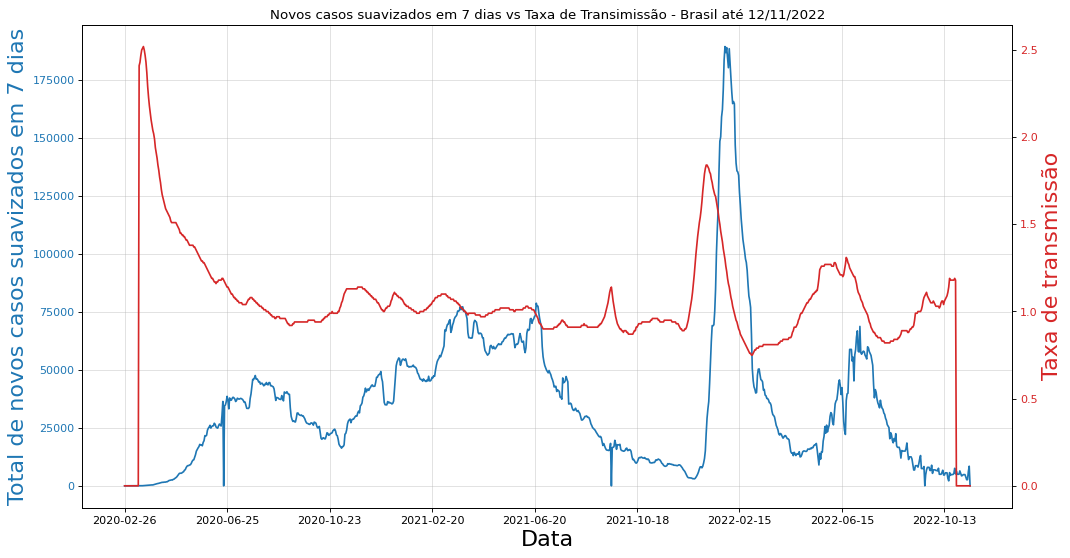

In [50]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_cases_smoothed']
y2 = date_group_brazil['reproduction_rate']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novos casos suavizados em 7 dias',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Taxa de transmissão',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Novos casos suavizados em 7 dias vs Taxa de Transimissão - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Total de novas mortes vs novas mortes suavizadas em 7 dias - Brasil até 12/11/2022')

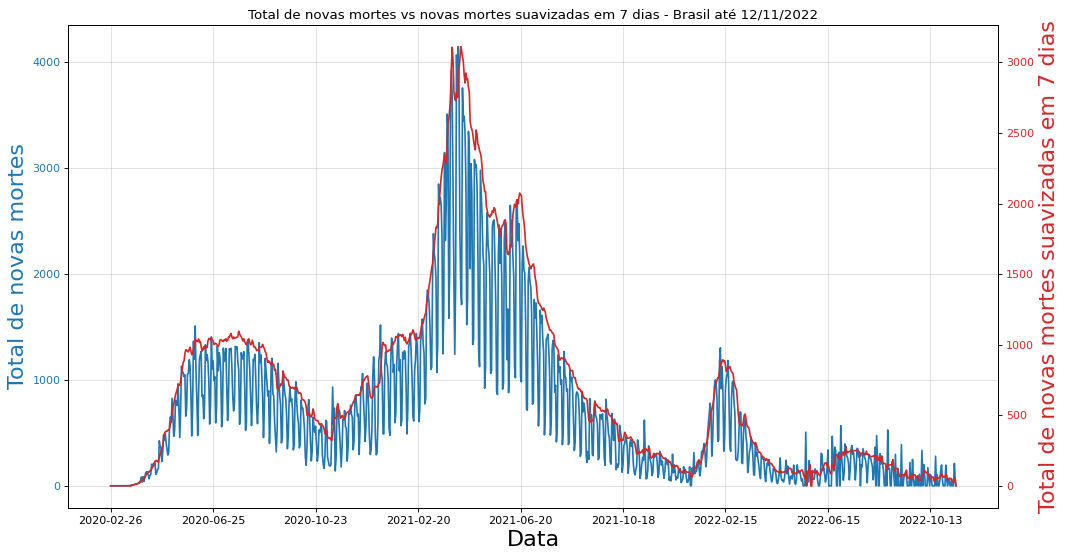

In [51]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_deaths']
y2 = date_group_brazil['new_deaths_smoothed']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novas mortes',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Total de novas mortes suavizadas em 7 dias',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Total de novas mortes vs novas mortes suavizadas em 7 dias - Brasil até 12/11/2022')

Text(0.5, 1.0, 'Novas mortes suavizadas em 7 dias vs Taxa de Transimissão - Brasil até 12/11/2022')

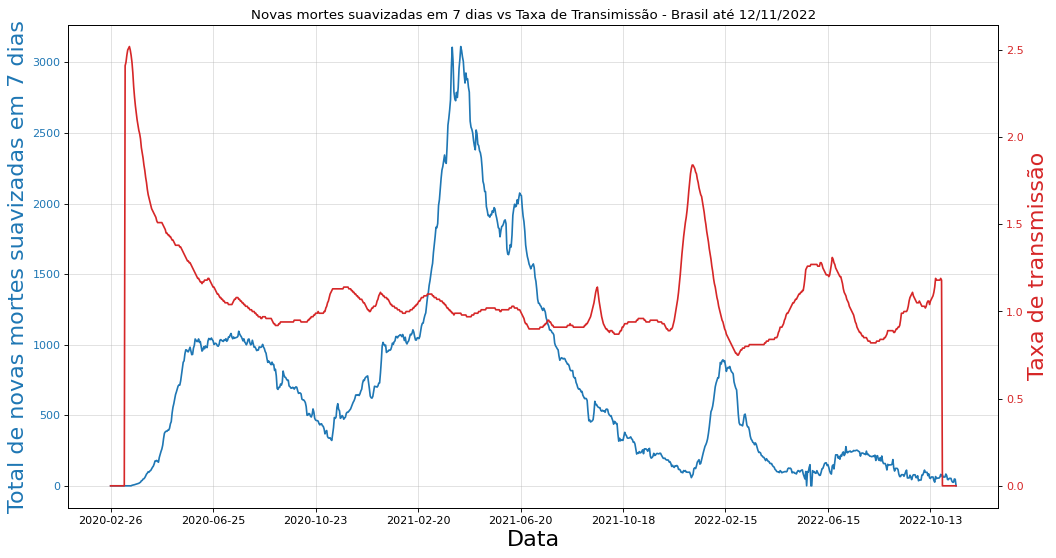

In [52]:
#preparação dos dados
x = date_group_brazil['date']
y1 = date_group_brazil['new_deaths_smoothed']
y2 = date_group_brazil['reproduction_rate']

#linha 1
fig, ax1 = plt.subplots(1,1,figsize=(15,8), dpi= 80)
ax1.plot(x,y1,color='tab:blue')

#linha 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:red')

#formatação da linha 1
ax1.set_xlabel('Data',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=10)
ax1.set_ylabel('Total de novas mortes suavizadas em 7 dias',color='tab:blue',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(alpha=0.4)

#formatação da linha 2
ax2.set_ylabel('Taxa de transmissão',fontsize=20,color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_xticks(np.arange(0,len(x),120))#
ax2.set_title('Novas mortes suavizadas em 7 dias vs Taxa de Transimissão - Brasil até 12/11/2022')

In [53]:
correlacao = df_brazil.corr()
correlacao

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
total_cases,1.000000,0.031729,0.052848,0.971398,-0.310441,-0.329072,-0.268508,0.782593,0.767389,0.766886,0.696003,NaN
new_cases,0.031729,1.000000,0.863068,0.072333,0.530762,0.427854,0.054701,-0.013212,0.005690,-0.002811,-0.049658,NaN
new_cases_smoothed,0.052848,0.863068,1.000000,0.095833,0.472455,0.507227,0.004815,0.000279,0.021762,0.009472,-0.040546,NaN
total_deaths,0.971398,0.072333,0.095833,1.000000,-0.244104,-0.252660,-0.259759,0.771415,0.800337,0.760331,0.587824,NaN
new_deaths,-0.310441,0.530762,0.472455,-0.244104,1.000000,0.907622,-0.042615,-0.400397,-0.348153,-0.416437,-0.393891,NaN
new_deaths_smoothed,-0.329072,0.427854,0.507227,-0.252660,0.907622,1.000000,-0.067198,-0.430475,-0.370566,-0.449511,-0.428958,NaN
reproduction_rate,-0.268508,0.054701,0.004815,-0.259759,-0.042615,-0.067198,1.000000,-0.104233,-0.114960,-0.088804,-0.086057,NaN
total_vaccinations,0.782593,-0.013212,0.000279,0.771415,-0.400397,-0.430475,-0.104233,1.000000,0.968711,0.994172,0.882083,NaN
people_vaccinated,0.767389,0.005690,0.021762,0.800337,-0.348153,-0.370566,-0.114960,0.968711,1.000000,0.961859,0.767687,NaN
people_fully_vaccinated,0.766886,-0.002811,0.009472,0.760331,-0.416437,-0.449511,-0.088804,0.994172,0.961859,1.000000,0.862017,NaN


In [54]:
df_correlacao = df_brazil[['new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed','reproduction_rate',
                           'total_vaccinations','people_vaccinated','people_fully_vaccinated']]
df_correlacao.shape

(991, 8)

In [55]:
correlacao_selecao = df_correlacao.corr()
correlacao_selecao

,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated
new_cases,1.000000,0.863068,0.530762,0.427854,0.054701,-0.013212,0.005690,-0.002811
new_cases_smoothed,0.863068,1.000000,0.472455,0.507227,0.004815,0.000279,0.021762,0.009472
new_deaths,0.530762,0.472455,1.000000,0.907622,-0.042615,-0.400397,-0.348153,-0.416437
new_deaths_smoothed,0.427854,0.507227,0.907622,1.000000,-0.067198,-0.430475,-0.370566,-0.449511
reproduction_rate,0.054701,0.004815,-0.042615,-0.067198,1.000000,-0.104233,-0.114960,-0.088804
total_vaccinations,-0.013212,0.000279,-0.400397,-0.430475,-0.104233,1.000000,0.968711,0.994172
people_vaccinated,0.005690,0.021762,-0.348153,-0.370566,-0.114960,0.968711,1.000000,0.961859
people_fully_vaccinated,-0.002811,0.009472,-0.416437,-0.449511,-0.088804,0.994172,0.961859,1.000000


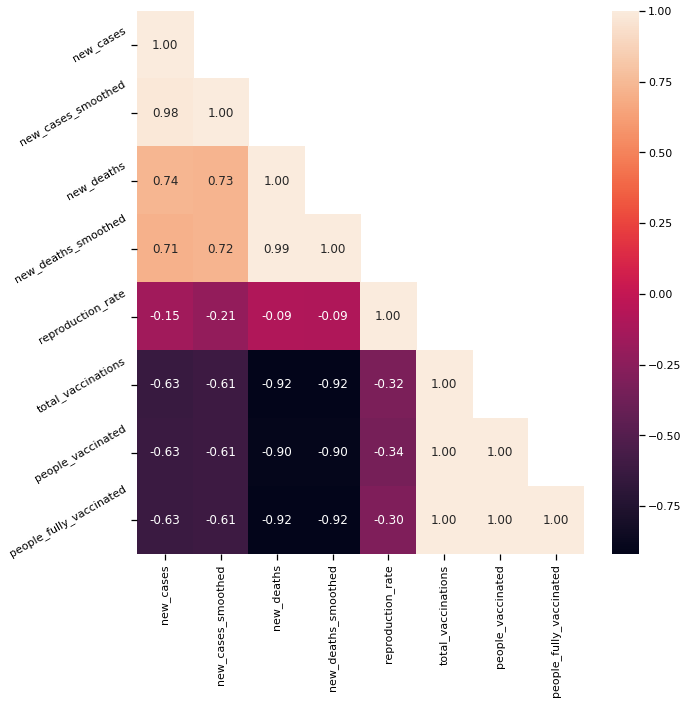

In [56]:
corr = correlacao_selecao.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

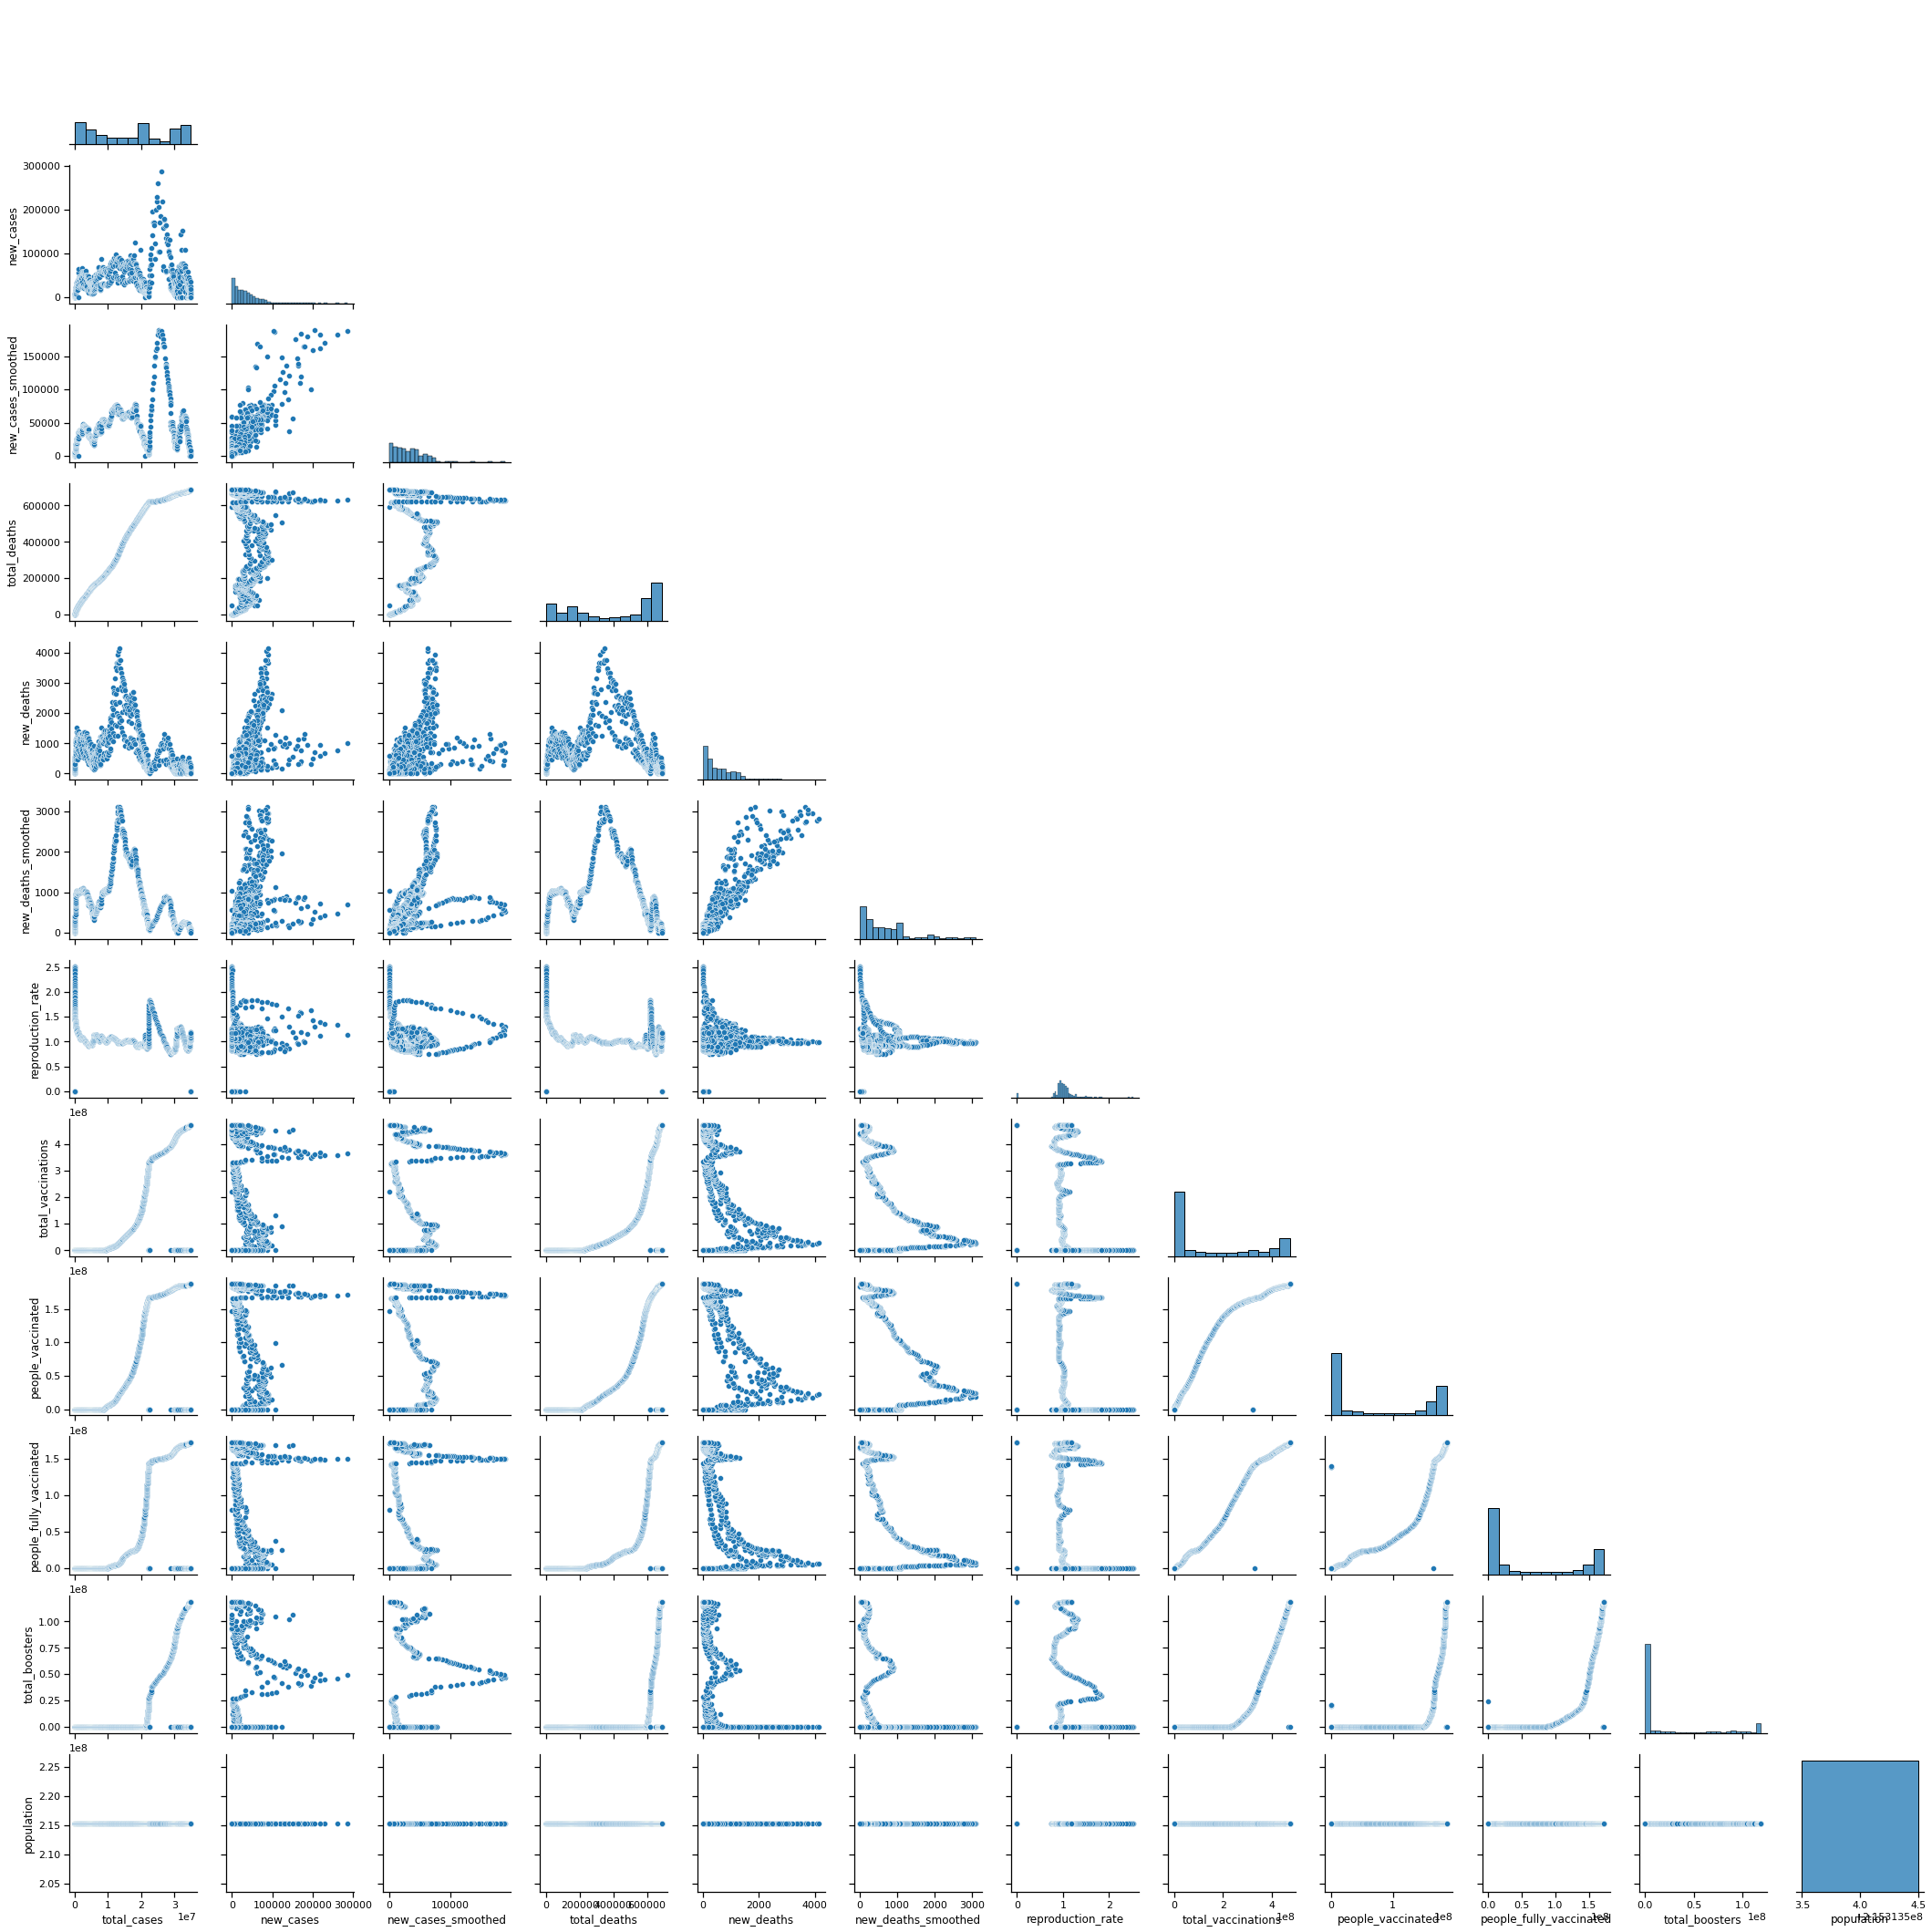

In [ ]:
colors = ['red','blue','black','green','yellow']
sns.pairplot(data=df_brazil,corner=True,palette=colors)